In [1]:
import pandas as pd
import numpy as np
import random
import numpy as np
import tensorflow as tf
import os

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

os.environ["PYTHONHASHSEED"] = str(SEED)

c:\Users\Komputer\Documents\KN_Cybertech_kurs\AI_course\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Wczytanie danych

In [2]:
phones_data = pd.read_csv('dataset.csv')

phones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1935 non-null   int64  
 1   battery_power  1935 non-null   int64  
 2   blue           1915 non-null   object 
 3   clock_speed    1935 non-null   float64
 4   dual_sim       1935 non-null   int64  
 5   fc             1935 non-null   int64  
 6   four_g         1935 non-null   object 
 7   int_memory     1935 non-null   int64  
 8   m_dep          1935 non-null   float64
 9   mobile_wt      1935 non-null   int64  
 10  n_cores        1935 non-null   int64  
 11  pc             1935 non-null   int64  
 12  px_height      1935 non-null   int64  
 13  px_width       1935 non-null   int64  
 14  ram            1913 non-null   float64
 15  sc_h           1935 non-null   int64  
 16  sc_w           1935 non-null   int64  
 17  talk_time      1873 non-null   float64
 18  three_g 

In [3]:
phones_data.head(10)

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,no,2.2,0,1,no,7,0.6,188,...,20,756,2549.0,9,7,19.0,0,0,wifi,medium cost
1,1,1021,yes,0.5,1,0,yes,53,0.7,136,...,905,1988,2631.0,17,3,7.0,1,1,no_wifi,high cost
2,2,563,yes,0.5,1,2,yes,41,0.9,145,...,1263,1716,2603.0,11,2,9.0,1,1,no_wifi,high cost
3,3,615,yes,2.5,0,0,no,10,0.8,131,...,1216,1786,2769.0,16,8,11.0,1,0,no_wifi,high cost
4,4,1821,yes,1.2,0,13,yes,44,0.6,141,...,1208,1212,1411.0,8,2,15.0,1,1,no_wifi,medium cost
5,5,1859,no,0.5,1,3,no,22,0.7,164,...,1004,1654,1067.0,17,1,10.0,1,0,no_wifi,medium cost
6,6,1821,no,1.7,0,4,yes,10,0.8,139,...,381,1018,3220.0,13,8,18.0,1,0,wifi,very high cost
7,7,1954,no,0.5,1,0,no,24,0.8,187,...,512,1149,700.0,16,3,5.0,1,1,wifi,low cost
8,8,1445,yes,0.5,0,0,no,53,0.7,174,...,386,836,1099.0,17,1,20.0,1,0,no_wifi,low cost
9,9,509,yes,0.6,1,2,yes,9,0.1,93,...,1137,1224,513.0,19,10,12.0,1,0,no_wifi,low cost


In [4]:
phones_data.drop(columns=phones_data.columns[0], inplace=True)

In [5]:
phones_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,no,2.2,0,1,no,7,0.6,188,2,...,20,756,2549.0,9,7,19.0,0,0,wifi,medium cost
1,1021,yes,0.5,1,0,yes,53,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1,no_wifi,high cost
2,563,yes,0.5,1,2,yes,41,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1,no_wifi,high cost
3,615,yes,2.5,0,0,no,10,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0,no_wifi,high cost
4,1821,yes,1.2,0,13,yes,44,0.6,141,2,...,1208,1212,1411.0,8,2,15.0,1,1,no_wifi,medium cost
5,1859,no,0.5,1,3,no,22,0.7,164,1,...,1004,1654,1067.0,17,1,10.0,1,0,no_wifi,medium cost
6,1821,no,1.7,0,4,yes,10,0.8,139,8,...,381,1018,3220.0,13,8,18.0,1,0,wifi,very high cost
7,1954,no,0.5,1,0,no,24,0.8,187,4,...,512,1149,700.0,16,3,5.0,1,1,wifi,low cost
8,1445,yes,0.5,0,0,no,53,0.7,174,7,...,386,836,1099.0,17,1,20.0,1,0,no_wifi,low cost
9,509,yes,0.6,1,2,yes,9,0.1,93,5,...,1137,1224,513.0,19,10,12.0,1,0,no_wifi,low cost


In [6]:
phones_data.isnull().sum()

battery_power     0
blue             20
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram              22
sc_h              0
sc_w              0
talk_time        62
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

### Zamiana wartości tekstowych na binarne

In [7]:
binary_map = {
    "yes": 1,
    "no": 0,
    "wifi": 1,
    "no_wifi": 0
}

columns_to_map = ["blue", "four_g", "wifi"]

for col in columns_to_map:
    phones_data[col] = phones_data[col].map(binary_map)

In [8]:
phones_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549.0,9,7,19.0,0,0,1,medium cost
1,1021,1.0,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1,0,high cost
2,563,1.0,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1,0,high cost
3,615,1.0,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0,0,high cost
4,1821,1.0,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411.0,8,2,15.0,1,1,0,medium cost
5,1859,0.0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067.0,17,1,10.0,1,0,0,medium cost
6,1821,0.0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220.0,13,8,18.0,1,0,1,very high cost
7,1954,0.0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700.0,16,3,5.0,1,1,1,low cost
8,1445,1.0,0.5,0,0,0,53,0.7,174,7,...,386,836,1099.0,17,1,20.0,1,0,0,low cost
9,509,1.0,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513.0,19,10,12.0,1,0,0,low cost


In [9]:
phones_data.dtypes


battery_power      int64
blue             float64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram              float64
sc_h               int64
sc_w               int64
talk_time        float64
three_g            int64
touch_screen       int64
wifi               int64
price_range       object
dtype: object

### Klasyfikacja półek cenowych na liczby

In [10]:
price_map = {
    "low cost": 0,
    "medium cost": 1,
    "high cost": 2,
    "very high cost": 3
}

phones_data["price_range"] = phones_data["price_range"].map(price_map)

In [11]:
phones_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549.0,9,7,19.0,0,0,1,1
1,1021,1.0,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1,0,2
2,563,1.0,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1,0,2
3,615,1.0,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0,0,2
4,1821,1.0,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411.0,8,2,15.0,1,1,0,1
5,1859,0.0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067.0,17,1,10.0,1,0,0,1
6,1821,0.0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220.0,13,8,18.0,1,0,1,3
7,1954,0.0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700.0,16,3,5.0,1,1,1,0
8,1445,1.0,0.5,0,0,0,53,0.7,174,7,...,386,836,1099.0,17,1,20.0,1,0,0,0
9,509,1.0,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513.0,19,10,12.0,1,0,0,0


In [12]:
phones_data.isnull().sum()


battery_power     0
blue             20
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram              22
sc_h              0
sc_w              0
talk_time        62
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

### Podział danych na cechy i etykiety (X i y)

In [13]:
X = phones_data.drop("price_range", axis=1)
y = phones_data["price_range"]

In [14]:
X.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0.0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549.0,9,7,19.0,0,0,1
1,1021,1.0,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631.0,17,3,7.0,1,1,0
2,563,1.0,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603.0,11,2,9.0,1,1,0
3,615,1.0,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769.0,16,8,11.0,1,0,0
4,1821,1.0,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411.0,8,2,15.0,1,1,0
5,1859,0.0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067.0,17,1,10.0,1,0,0
6,1821,0.0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220.0,13,8,18.0,1,0,1
7,1954,0.0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700.0,16,3,5.0,1,1,1
8,1445,1.0,0.5,0,0,0,53,0.7,174,7,14,386,836,1099.0,17,1,20.0,1,0,0
9,509,1.0,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513.0,19,10,12.0,1,0,0


In [15]:
y.head(10)

0    1
1    2
2    2
3    2
4    1
5    1
6    3
7    0
8    0
9    0
Name: price_range, dtype: int64

### Uzupełnienie braków w kolumnach

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42, stratify=y_other)

In [17]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
  ("imputer", SimpleImputer(strategy="median")),
  ("scaler", StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)
X_test = pipe.transform(X_test)

In [18]:
X_test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### Model Bazowy (Logistic Regression)

Balanced Accuracy: 0.914
Macro F1 Score: 0.914


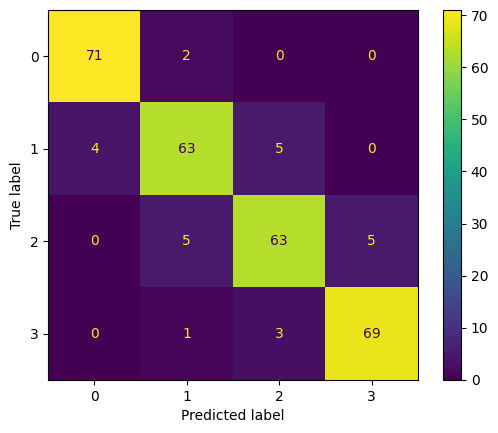

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, f1_score, ConfusionMatrixDisplay

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
bal_acc = balanced_accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")

print(f"Balanced Accuracy: {bal_acc:.3f}")
print(f"Macro F1 Score: {f1_macro:.3f}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=3))

model_lr = model

              precision    recall  f1-score   support

           0      0.947     0.973     0.959        73
           1      0.887     0.875     0.881        72
           2      0.887     0.863     0.875        73
           3      0.932     0.945     0.939        73

    accuracy                          0.914       291
   macro avg      0.913     0.914     0.914       291
weighted avg      0.914     0.914     0.914       291



### Sieć Neuronowa

In [21]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [22]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

initial_weights = model.get_weights()
model.set_weights(initial_weights)

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-5)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=1)

Epoch 1/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2607 - loss: 2.1992 - val_accuracy: 0.3345 - val_loss: 1.4292 - learning_rate: 0.0010
Epoch 2/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3035 - loss: 1.8520 - val_accuracy: 0.4034 - val_loss: 1.3539 - learning_rate: 0.0010
Epoch 3/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3323 - loss: 1.6966 - val_accuracy: 0.4483 - val_loss: 1.2800 - learning_rate: 0.0010
Epoch 4/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3626 - loss: 1.5657 - val_accuracy: 0.5138 - val_loss: 1.2018 - learning_rate: 0.0010
Epoch 5/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4032 - loss: 1.4361 - val_accuracy: 0.5448 - val_loss: 1.1289 - learning_rate: 0.0010
Epoch 6/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4114 - loss: 1.3920 - val_accuracy: 0.5690 - val_loss: 1.0560 - learning_rate: 0.0010
Epoch 7/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.2471 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
NN Balanced Accuracy: 0.938
NN Macro F1: 0.938


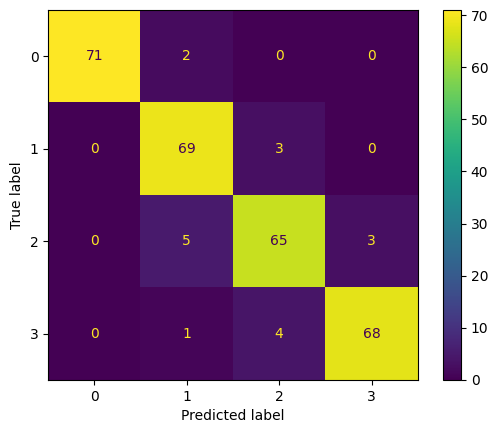

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_nn = np.argmax(model.predict(X_test), axis=1)

bal_acc_nn = balanced_accuracy_score(y_test, y_pred_nn)
f1_macro_nn = f1_score(y_test, y_pred_nn, average="macro")

print(f"NN Balanced Accuracy: {bal_acc_nn:.3f}")
print(f"NN Macro F1: {f1_macro_nn:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn)

In [25]:
print(classification_report(y_test, y_pred_nn, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.973     0.986        73
           1      0.896     0.958     0.926        72
           2      0.903     0.890     0.897        73
           3      0.958     0.932     0.944        73

    accuracy                          0.938       291
   macro avg      0.939     0.938     0.938       291
weighted avg      0.939     0.938     0.938       291



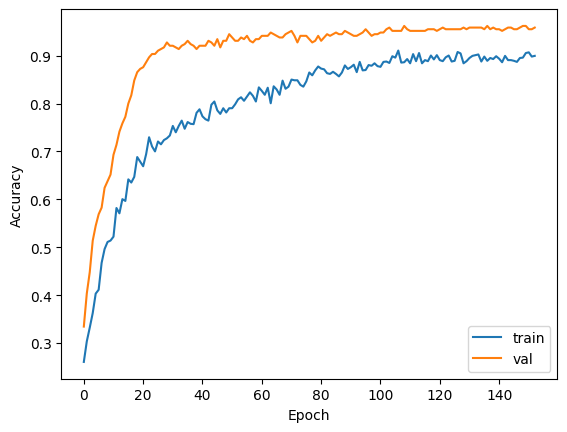

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model_nn = model

### Alternatywna Sieć Neuronowa: CategoricalCrossentropy

In [27]:
from keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical
from keras.optimizers import Adam

y_train_cat = to_categorical(y_train, num_classes=4)
y_val_cat = to_categorical(y_val, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
loss_fn = CategoricalCrossentropy(label_smoothing=0.2)

initial_weights = model.get_weights()
model.set_weights(initial_weights)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-5)

history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=1000, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=1)

y_pred_cc = np.argmax(model.predict(X_test), axis=1)

bal_acc_cc = balanced_accuracy_score(y_test, y_pred_cc)
f1_macro_cc = f1_score(y_test, y_pred_cc, average="macro")

print(f"NN Balanced Accuracy: {bal_acc_cc:.3f}")
print(f"NN Macro F1: {f1_macro_cc:.3f}")

Epoch 1/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2496 - loss: 2.2476 - val_accuracy: 0.2966 - val_loss: 1.4883 - learning_rate: 0.0010
Epoch 2/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3013 - loss: 1.9121 - val_accuracy: 0.3552 - val_loss: 1.4222 - learning_rate: 0.0010
Epoch 3/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2991 - loss: 1.8077 - val_accuracy: 0.4241 - val_loss: 1.3756 - learning_rate: 0.0010
Epoch 4/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 1.7059 - val_accuracy: 0.4621 - val_loss: 1.3345 - learning_rate: 0.0010
Epoch 5/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3641 - loss: 1.6019 - val_accuracy: 0.4966 - val_loss: 1.3029 - learning_rate: 0.0010
Epoch 6/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3501 - loss: 1.5398 - val_accuracy: 0.5172 - val_loss: 1.2746 - learning_rate: 0.0010
Epoch 7/1000
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3767 - loss: 1.4760 - 

              precision    recall  f1-score   support

           0      1.000     0.932     0.965        73
           1      0.848     0.931     0.887        72
           2      0.889     0.877     0.883        73
           3      0.958     0.945     0.952        73

    accuracy                          0.921       291
   macro avg      0.924     0.921     0.922       291
weighted avg      0.924     0.921     0.922       291



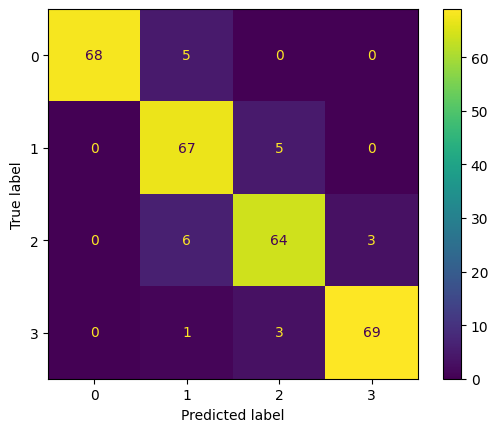

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cc)
print(classification_report(y_test, y_pred_cc, digits=3))

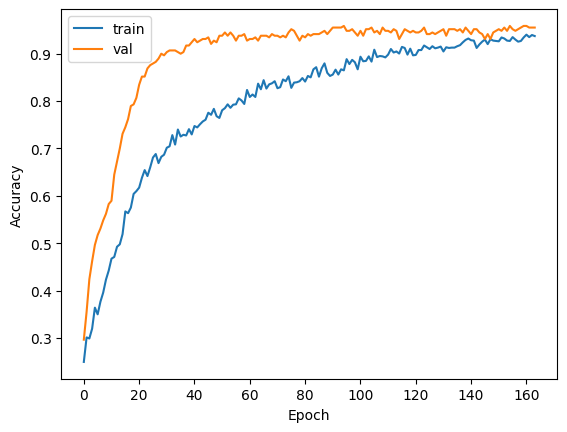

In [29]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Random Forest Classifier

RF Balanced accuracy: 0.8347602739726028
RF Macro F1: 0.8334807720010586
              precision    recall  f1-score   support

           0      0.932     0.932     0.932        73
           1      0.740     0.750     0.745        72
           2      0.765     0.712     0.738        73
           3      0.896     0.945     0.920        73

    accuracy                          0.835       291
   macro avg      0.833     0.835     0.833       291
weighted avg      0.833     0.835     0.834       291



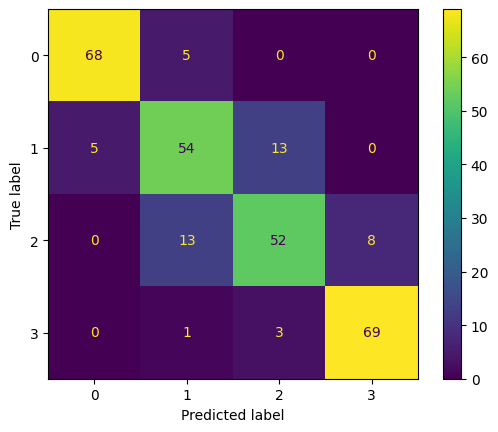

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, random_state=42, n_jobs=-1)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
from sklearn.metrics import balanced_accuracy_score, f1_score

print("RF Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("RF Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf, digits=3))

### Ensembling modeli

#### Ensembling LR i NN

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
=== Ensemble ===
Balanced accuracy: 0.9382134703196348
Macro F1: 0.9383204440844455
              precision    recall  f1-score   support

           0      1.000     0.973     0.986        73
           1      0.896     0.958     0.926        72
           2      0.903     0.890     0.897        73
           3      0.958     0.932     0.944        73

    accuracy                          0.938       291
   macro avg      0.939     0.938     0.938       291
weighted avg      0.939     0.938     0.938       291



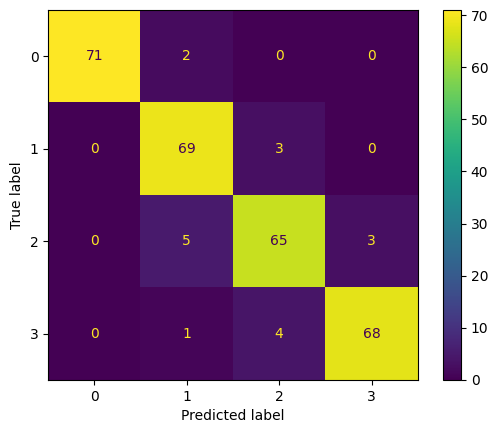

In [31]:
proba_lr = model_lr.predict_proba(X_test)  
proba_nn = model_nn.predict(X_test, verbose=1)   

proba_ensemble = proba_lr * 0.1 + proba_nn * 0.9

y_pred_ensemble = np.argmax(proba_ensemble, axis=1)

print("=== Ensemble ===")
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_ensemble))
print("Macro F1:", f1_score(y_test, y_pred_ensemble, average="macro"))
print(classification_report(y_test, y_pred_ensemble, digits=3))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#### Ensembling RF i NN

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
=== Ensemble ===
Balanced accuracy: 0.9382134703196348
Macro F1: 0.9383204440844455
              precision    recall  f1-score   support

           0      1.000     0.973     0.986        73
           1      0.896     0.958     0.926        72
           2      0.903     0.890     0.897        73
           3      0.958     0.932     0.944        73

    accuracy                          0.938       291
   macro avg      0.939     0.938     0.938       291
weighted avg      0.939     0.938     0.938       291



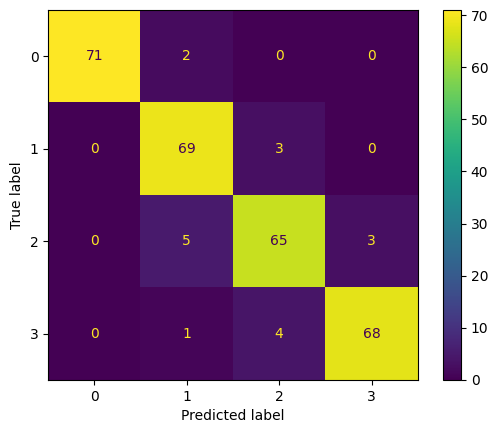

In [32]:
proba_rf = model_rf.predict_proba(X_test)  
proba_nn = model_nn.predict(X_test, verbose=1)   

proba_ensemble = proba_rf * 0.1 + proba_nn * 0.9

y_pred_ensemble = np.argmax(proba_ensemble, axis=1)

print("=== Ensemble ===")
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_ensemble))
print("Macro F1:", f1_score(y_test, y_pred_ensemble, average="macro"))
print(classification_report(y_test, y_pred_ensemble, digits=3))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#### Ensembling LR, RF i NN

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
=== Ensemble ===
Balanced accuracy: 0.9449676560121766
Macro F1: 0.945036094267655
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.89      0.93      0.91        72
           2       0.93      0.90      0.92        73
           3       0.97      0.97      0.97        73

    accuracy                           0.95       291
   macro avg       0.95      0.94      0.95       291
weighted avg       0.95      0.95      0.95       291



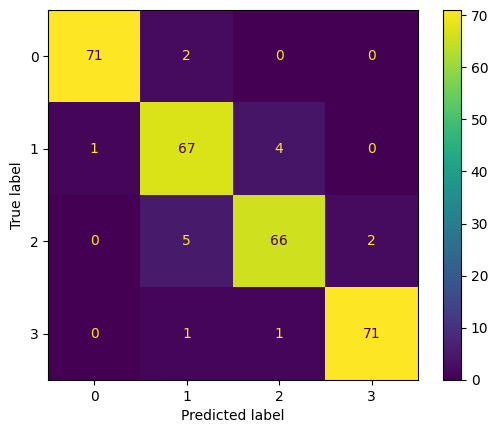

In [33]:
proba_lr = model_lr.predict_proba(X_test)
proba_rf = model_rf.predict_proba(X_test)
proba_nn = model_nn.predict(X_test)

proba_ensemble = proba_lr * 0.3 + proba_rf * 0.3 + proba_nn * 0.4
y_pred_ensemble = np.argmax(proba_ensemble, axis=1)

print("=== Ensemble ===")
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_ensemble))
print("Macro F1:", f1_score(y_test, y_pred_ensemble, average="macro"))
print(classification_report(y_test, y_pred_ensemble))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])